# Block 1
Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Block 2
Function

In [35]:
def fit_data(X, y):
  """ 
  a function that uses decision tree classification to make predictions

  X = predictor
  y = thing you want to predict
  """

  # Use a train and test split with a random_seed = 1
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

  # Use decision tree binary classification
  tree_model = tree.DecisionTreeClassifier(max_depth = 10)
  tree_model.fit(X_train[:,np.newaxis], y_train)

  # Calculate training and testing scores
  train_score = tree_model.score(X_train[:,np.newaxis], y_train)
  test_score = tree_model.score(X_test[:,np.newaxis], y_test)

  print()
  print("Training score:")
  print(train_score)
  print()

  print("Testing score:")
  print(test_score)
  print()

  # Have an input function to determine whether or not to view plots
  plots = input("Input 'yes' to view plots")

  if plots == "yes":

    # Set axes and figure size
    fig, axes = plt.subplots(2, 1, figsize = [10, 15])

    # Create a boxplot showing distribution of X on y
    sns.boxplot(y, X, ax = axes[0])

    # Plot the ROC curve
    y_predicted = tree_model.predict_proba(X_test[:,np.newaxis])[:,1]
    FPR, TPR, thresholds = metrics.roc_curve(y_test, y_predicted)
    plt.plot(FPR, TPR, marker = "o")
    plt.plot([0,1], [0,1])  
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")

    plt.show()

  else:
    return

# Block 3
Loading data

In [3]:
data = sns.load_dataset("titanic")

# Block 4
Run the function for the passenger's class (pclass) variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Training score:
0.6826347305389222

Testing score:
0.6681614349775785

Input 'yes' to view plotsyes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


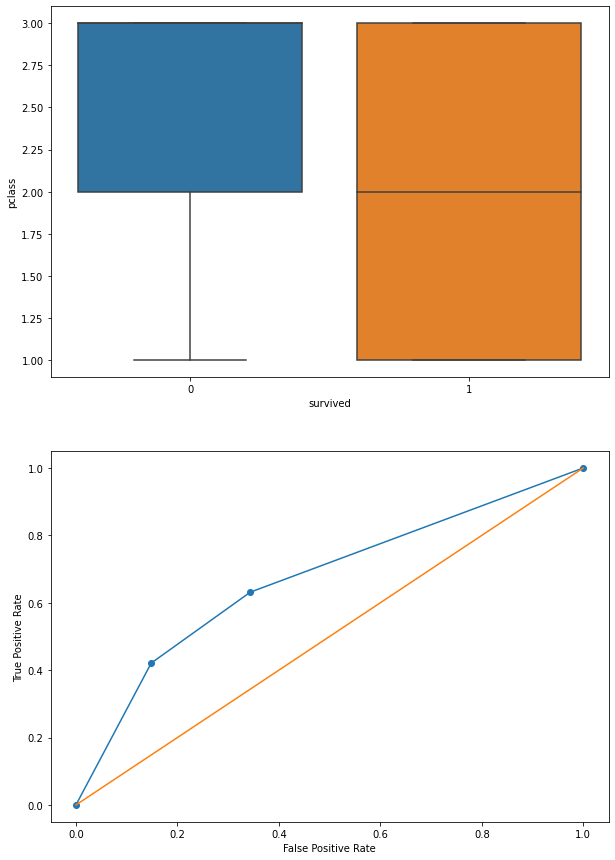

In [38]:
fit_data(data["pclass"], data["survived"])

# Block 5
Run the function for the passenger's ticket fare (fare) variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  



Training score:
0.7634730538922155

Testing score:
0.6636771300448431

Type 'yes' to view plotsyes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


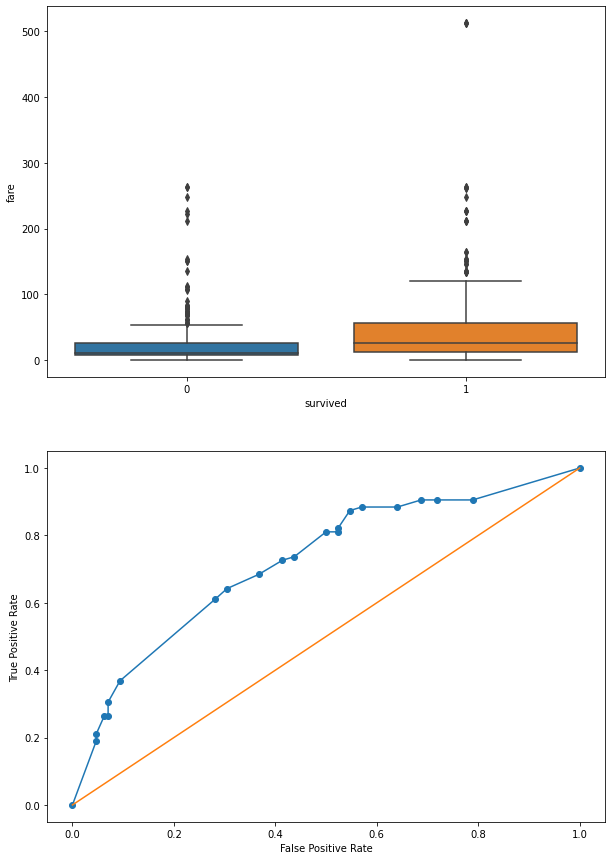

In [ ]:
fit_data(data["fare"], data["survived"])

## Findings

To increase Pat's chances of survival on the Titanic, I would recommend that he focus on being in a better class. I would recommend this because class is a better predictor of survival than ticket fare. This can be concluded by comparing the testing scores of the pclass and fare variables. The testing score for class (0.6682) is slightly higher (about 0.0045) than the testing score for ticket fare (0.6637), so the model trained on class was better at predicting survival for individuals who were not included in the training set. There may have also been overfitting in the model predicting survival based on ticket fare, as the difference between the training score and testing score is nearly 0.10. Meanwhile, the difference between training and testing scores in the model using class is not nearly as large, so it is less likely to be overfit to the training data.